In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration and analysis preparation

#### Reading the data and converting them into a Dataframe 

In [2]:
# Load all dataframes (using data_loader module)

from data_loader import load_dataset as load_all

other_road_users, sensors = load_all()
print('Loaded', len(other_road_users), 'other dataframes and', len(sensors), 'sensors dataframes')
print('Sample other_road_users keys:', list(other_road_users.keys())[:10])
print('Sample sensors keys:', list(sensors.keys())[:10])

Loaded 12 other dataframes and 12 sensors dataframes
Sample other_road_users keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']
Sample sensors keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']


In [3]:
# See the columns of other_road_users dataframes

other_road_users['ebike_subject_a'].columns

Index(['frame_index', 'track_id', 'class_name', 'angle', 'distance', 'x', 'y',
       'x_inter', 'y_inter', 'x_inter_rts', 'y_inter_rts', 'vx_rts', 'vy_rts',
       'interpolated', 'corrected_class'],
      dtype='object')

In [4]:
# See the columns of sensors dataframes

sensors['ebike_subject_a'].columns

Index(['timestamp', 'cts_gopro', 'date_gopro', 'GPS (Lat.) [deg]',
       'GPS (Long.) [deg]', 'GPS (Alt.) [m]', 'GPS (2D speed) [m/s]',
       'precision', 'cts_gyro', 'date_gyro', 'Gyroscope (z) [rad/s]',
       'Gyroscope (x) [rad/s]', 'Gyroscope (y) [rad/s]', 'cts_acc', 'date_acc',
       'Accelerometer (z) [m/s²]', 'Accelerometer (x) [m/s²]',
       'Accelerometer (y) [m/s²]', 'Accelerometer (x) Filtered [m/s²]',
       'Accelerometer (y) Filtered [m/s²]',
       'Accelerometer (z) Filtered [m/s²]', 'Filtered velocity [m/s]',
       'bearing', 'frame_index'],
      dtype='object')

In [5]:
# Search for the e-scooter met
sensors['ebike_subject_a'].head()

,timestamp,cts_gopro,date_gopro,GPS (Lat.) [deg],GPS (Long.) [deg],GPS (Alt.) [m],GPS (2D speed) [m/s],precision,cts_gyro,date_gyro,...,date_acc,Accelerometer (z) [m/s²],Accelerometer (x) [m/s²],Accelerometer (y) [m/s²],Accelerometer (x) Filtered [m/s²],Accelerometer (y) Filtered [m/s²],Accelerometer (z) Filtered [m/s²],Filtered velocity [m/s],bearing,frame_index
0,1759157046155000000,2160.052632,2025-09-29T14:44:08.255Z,45.779397,4.925615,175.889,2.038,125,36.606557,2025-09-29T14:44:06.155Z,...,2025-09-29T14:44:06.153Z,-8.470024,-2.047962,-0.597122,-6.656665,3.017190,-9.655393,2.026448,105.928753,1
1,1759157046255000000,2265.421053,2025-09-29T14:44:08.359Z,45.779395,4.925616,175.901,2.078,125,137.590164,2025-09-29T14:44:06.255Z,...,2025-09-29T14:44:06.253Z,-6.141487,-6.791367,0.071942,-3.216082,1.584849,-9.643375,2.154997,119.640502,3
2,1759157046355000000,2370.789474,2025-09-29T14:44:08.463Z,45.779393,4.925617,175.875,2.304,125,238.573770,2025-09-29T14:44:06.354Z,...,2025-09-29T14:44:06.357Z,-10.872902,12.570743,2.836930,-0.645584,0.503636,-9.673349,2.280301,126.809735,6
3,1759157046455000000,2476.157895,2025-09-29T14:44:08.567Z,45.779391,4.925619,175.883,2.411,125,339.557377,2025-09-29T14:44:06.454Z,...,2025-09-29T14:44:06.457Z,-8.676259,6.618705,-4.273381,0.711418,-0.230357,-9.725287,2.398887,159.221308,8
4,1759157046555000000,2581.526316,2025-09-29T14:44:08.672Z,45.779388,4.925620,175.853,2.703,125,441.803279,2025-09-29T14:44:06.555Z,...,2025-09-29T14:44:06.556Z,-13.225420,3.330935,-9.796163,1.198095,-0.763336,-9.771452,2.507339,159.271945,11


#### Pre-processing of the data

In [6]:
# See the number of missing data in the dataframes

for key in other_road_users:
    print(f"other_road_users['{key}'] missing data:\n", other_road_users[key].isna().sum())
for key in sensors:
    print(f"sensors['{key}'] missing data:\n", sensors[key].isna().sum())

other_road_users['ebike_subject_a'] missing data:
 frame_index          0
track_id             0
class_name         218
angle              218
distance           218
x                  218
y                  218
x_inter              0
y_inter              0
x_inter_rts          0
y_inter_rts          0
vx_rts               0
vy_rts               0
interpolated         0
corrected_class      0
dtype: int64
other_road_users['ebike_subject_b'] missing data:
 frame_index          0
track_id             0
class_name         716
angle              716
distance           716
x                  716
y                  716
x_inter              0
y_inter              0
x_inter_rts          0
y_inter_rts          0
vx_rts               0
vy_rts               0
interpolated         0
corrected_class      0
dtype: int64
other_road_users['escooter_subject_b'] missing data:
 frame_index          0
track_id             0
class_name         124
angle              124
distance           124
x            

In [7]:
# Remove all the missing data in all the dataframes

for key in other_road_users:
    other_road_users[key] = other_road_users[key].dropna()
for key in sensors:
    sensors[key] = sensors[key].dropna()

#### Regroup the users by trial

In [8]:
# Regroup the trials 
# each trial corresponds to a couple [ebike, escooter] 

# let's convert the date_gopro columns to datetime objects
for df in sensors.values():
    df['date_gopro'] = pd.to_datetime(df['date_gopro'])

# let's create a list of the first date_gopro for each dataframe sensors
trial_starts = []
for key, df in sensors.items():
    trial_starts.append((key, df['date_gopro'].min()))
trial_starts = sorted(trial_starts, key=lambda x: x[1])

trial_starts

[('ebike_subject_h', Timestamp('2025-09-29 13:59:27.223000+0000', tz='UTC')),
 ('escooter_subject_g',
  Timestamp('2025-09-29 13:59:43.350000+0000', tz='UTC')),
 ('escooter_subject_e',
  Timestamp('2025-09-29 14:16:24.465000+0000', tz='UTC')),
 ('ebike_subject_i', Timestamp('2025-09-29 14:16:32.392000+0000', tz='UTC')),
 ('ebike_subject_b', Timestamp('2025-09-29 14:29:18.593000+0000', tz='UTC')),
 ('escooter_subject_c',
  Timestamp('2025-09-29 14:29:29.199000+0000', tz='UTC')),
 ('ebike_subject_a', Timestamp('2025-09-29 14:44:08.255000+0000', tz='UTC')),
 ('escooter_subject_b',
  Timestamp('2025-09-29 15:01:29.304000+0000', tz='UTC')),
 ('ebike_subject_e', NaT),
 ('escooter_subject_h',
  Timestamp('2025-09-29 14:47:11.470000+0000', tz='UTC')),
 ('ebike_subject_g', Timestamp('2025-09-29 15:01:40.516000+0000', tz='UTC')),
 ('escooter_subject_k',
  Timestamp('2025-09-29 15:19:04.362000+0000', tz='UTC'))]

In [9]:
# Now we can regroup the trials 2 by 2 

trials = []
for i in range(0, len(trial_starts), 2):
    trial = (trial_starts[i][0], trial_starts[i+1][0])
    trials.append(trial)

trials

[('ebike_subject_h', 'escooter_subject_g'),
 ('escooter_subject_e', 'ebike_subject_i'),
 ('ebike_subject_b', 'escooter_subject_c'),
 ('ebike_subject_a', 'escooter_subject_b'),
 ('ebike_subject_e', 'escooter_subject_h'),
 ('ebike_subject_g', 'escooter_subject_k')]

#### Trajectories of MMV users

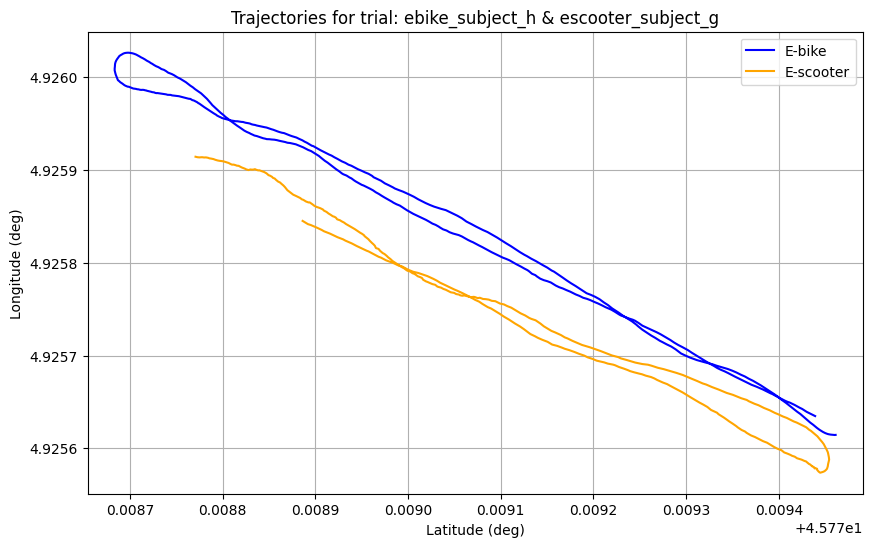

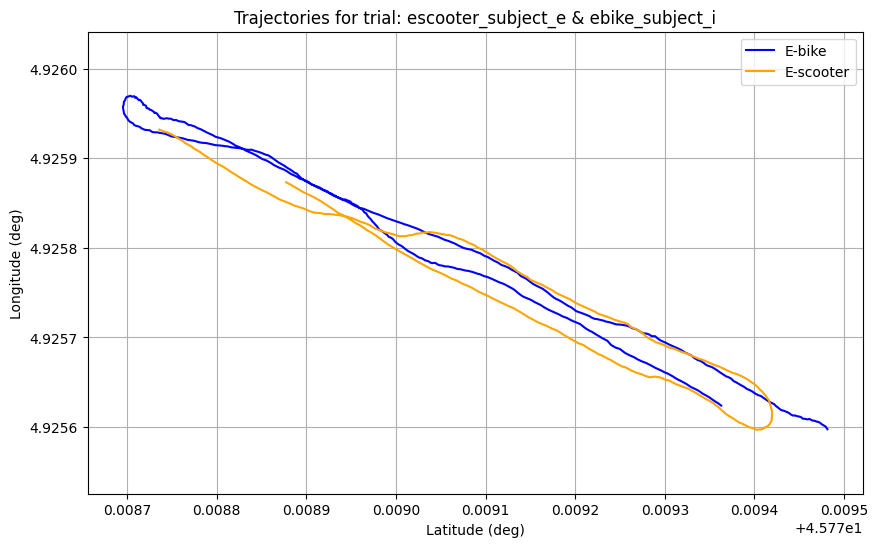

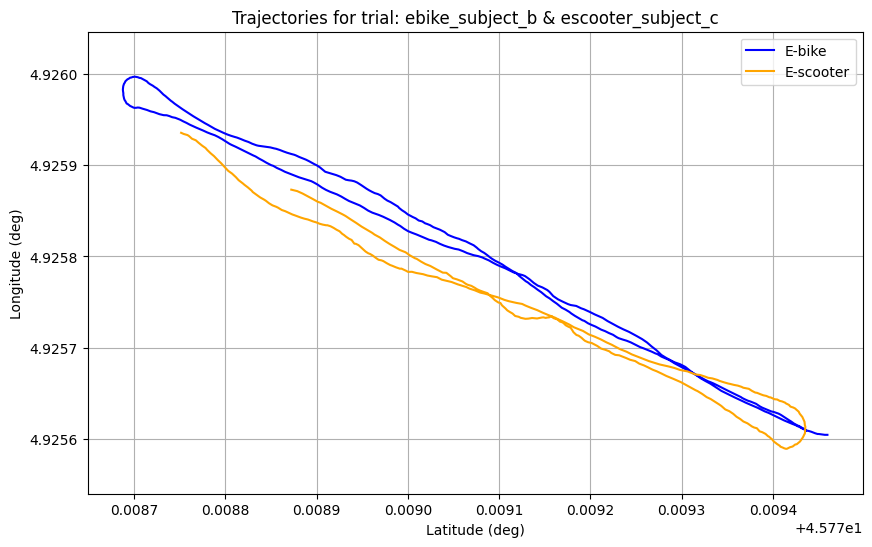

In [10]:
# Visualize the trajectories of the 3 first trials

for trial in trials[:3]:
    ebike_key, escooter_key = trial
    ebike_df = sensors[ebike_key]
    escooter_df = sensors[escooter_key]
    
    plt.figure(figsize=(10, 6))
    plt.plot(ebike_df['GPS (Lat.) [deg]'], ebike_df['GPS (Long.) [deg]'], label='E-bike', color='blue')
    plt.plot(escooter_df['GPS (Lat.) [deg]'], escooter_df['GPS (Long.) [deg]'], label='E-scooter', color='orange')
    plt.title(f'Trajectories for trial: {ebike_key} & {escooter_key}')
    plt.xlabel('Latitude (deg)')
    plt.ylabel('Longitude (deg)')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

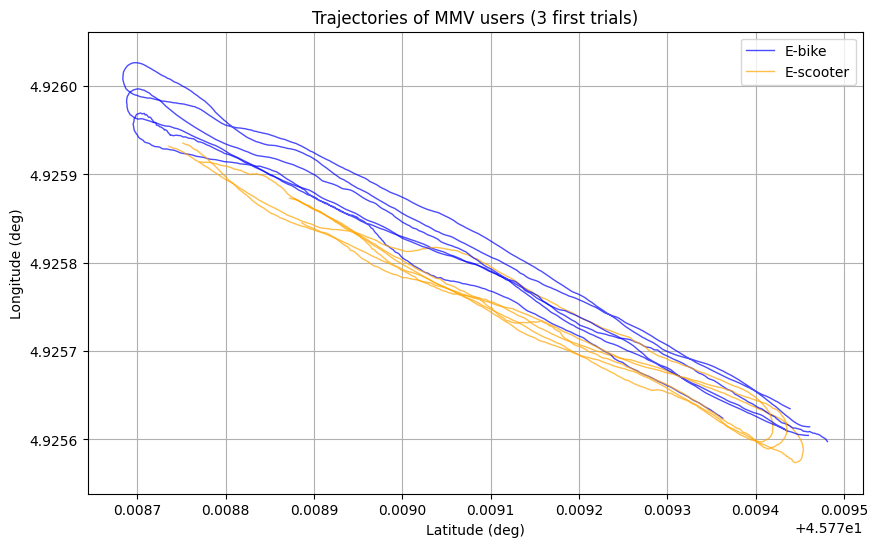

In [11]:
# On the same plot, visualize the trajectories of the e-bike and the e-scooter for the 3 first trials

plt.figure(figsize=(10, 6))
first_ebike = True
first_escooter = True

for trial in trials[:3]:   
    ebike_key, escooter_key = trial
    ebike_df = sensors[ebike_key]
    escooter_df = sensors[escooter_key]

    ebike_label = 'E-bike' if first_ebike else '_nolegend_'
    escooter_label = 'E-scooter' if first_escooter else '_nolegend_'

    plt.plot(ebike_df['GPS (Lat.) [deg]'], ebike_df['GPS (Long.) [deg]'],
             label=ebike_label, color='blue', alpha=0.7, linewidth=1)
    plt.plot(escooter_df['GPS (Lat.) [deg]'], escooter_df['GPS (Long.) [deg]'],
             label=escooter_label, color='orange', alpha=0.7, linewidth=1)

    first_ebike = False
    first_escooter = False

plt.title('Trajectories of MMV users (3 first trials)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Longitude (deg)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

#### Distance between MMV and pedestrians over time

C:\Users\antoi\AppData\Local\Temp\ipykernel_15380\1381930803.py:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = pd.to_numeric(df_plot['distance'], errors='coerce').fillna(method='ffill').fillna(method='bfill').to_numpy()


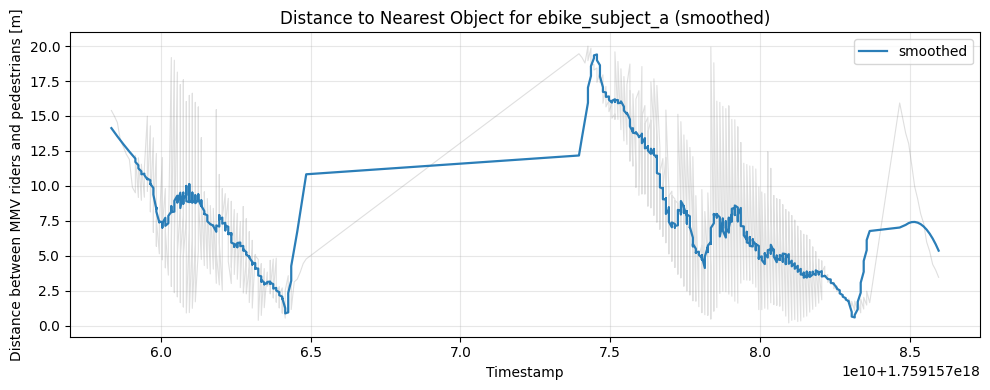

C:\Users\antoi\AppData\Local\Temp\ipykernel_15380\1381930803.py:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = pd.to_numeric(df_plot['distance'], errors='coerce').fillna(method='ffill').fillna(method='bfill').to_numpy()


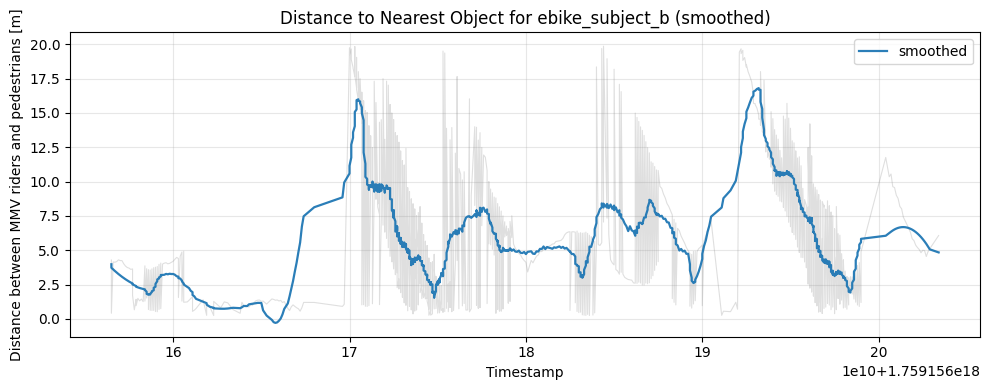

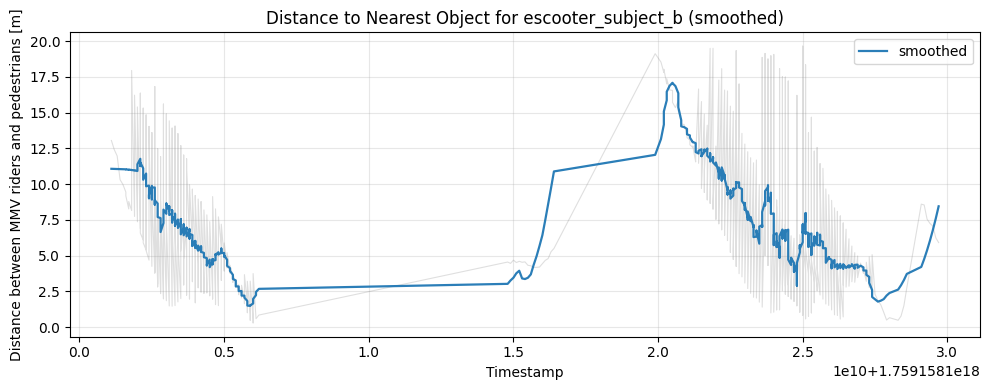

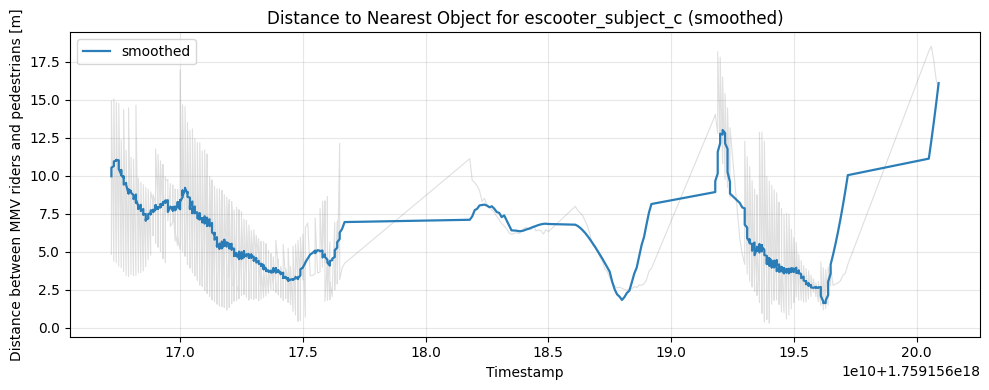

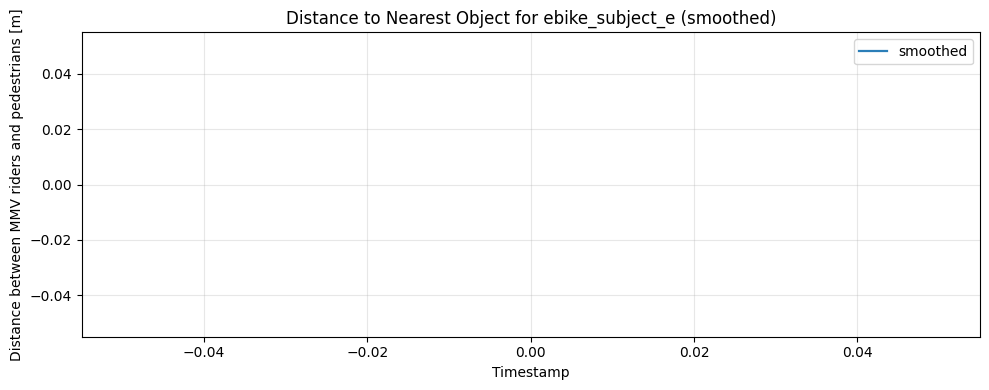

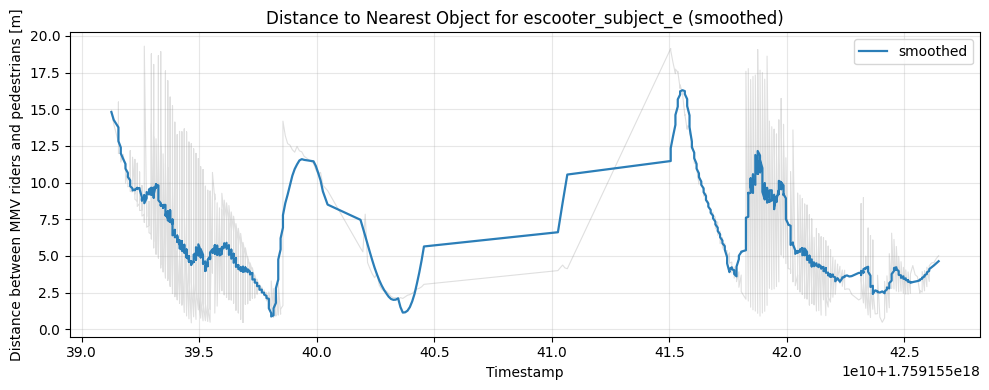

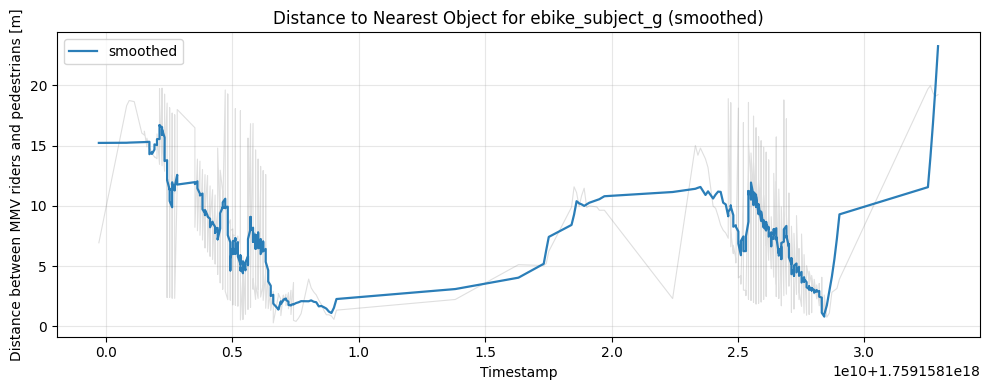

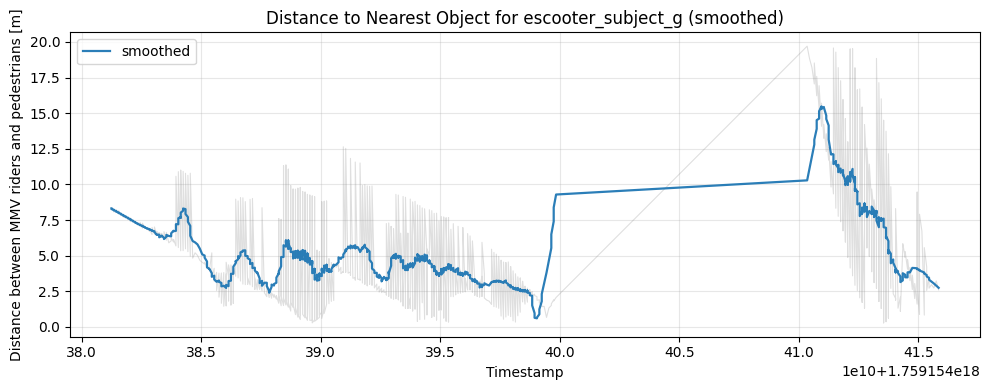

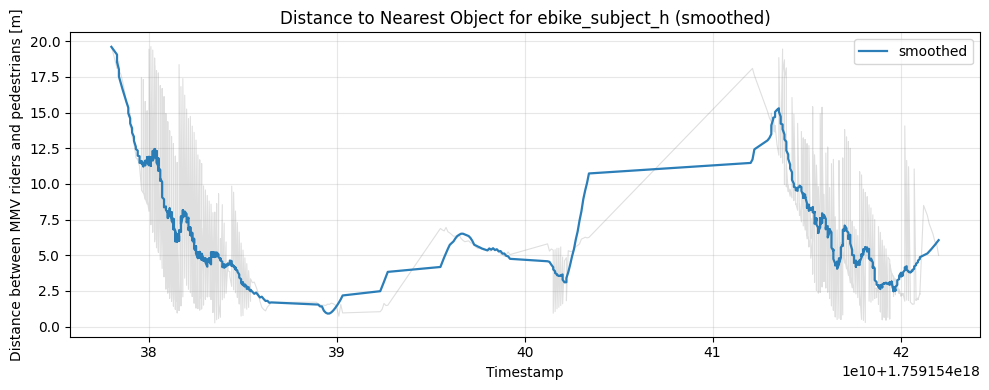

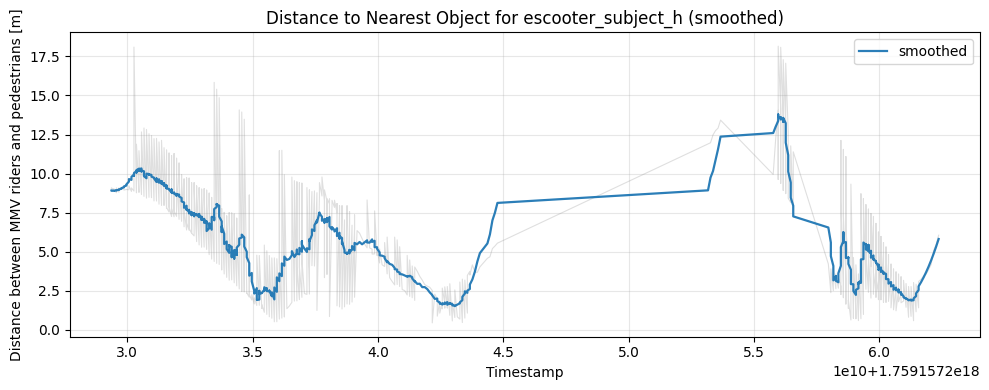

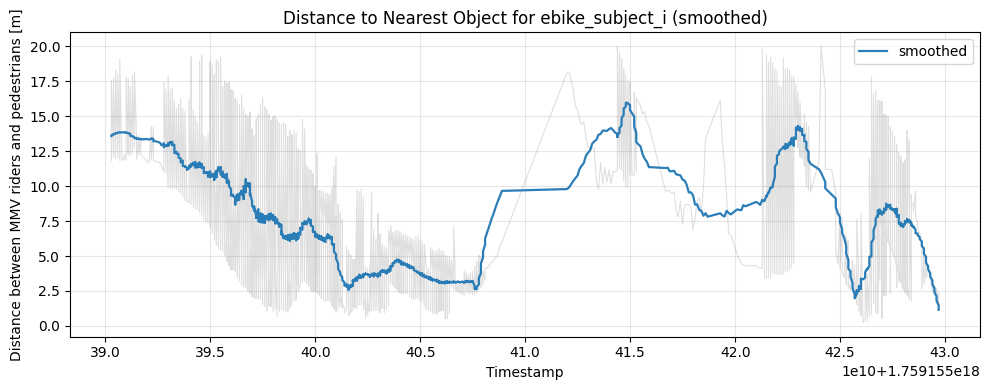

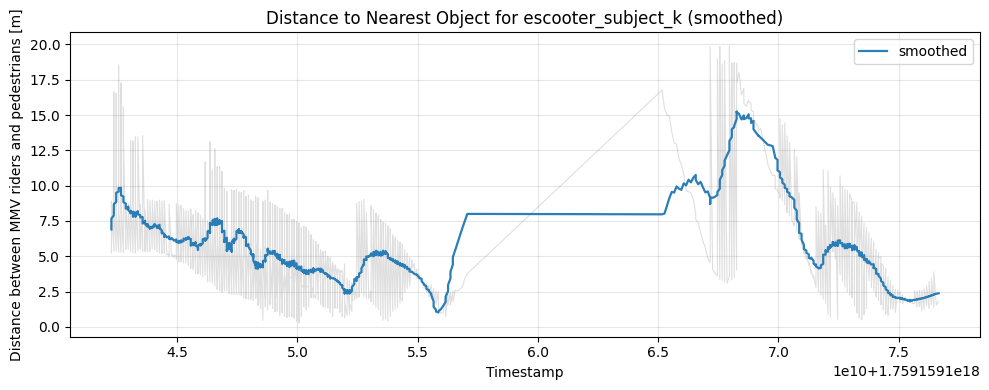

In [12]:
# Link sensors to other_road_users dataframes with the column 'frame_index'

linked_data = {}
for key in sensors:
    if key in other_road_users:
        sensor_df = sensors[key]
        oru_df = other_road_users[key]
        if 'frame_index' in sensor_df.columns and 'frame_index' in oru_df.columns:
            merged_df = pd.merge(sensor_df, oru_df, on='frame_index', suffixes=('_sensor', '_oru'))
            linked_data[key] = merged_df
        else:
            print(f"Skipping {key}: 'frame_index' column not found in one of the dataframes")
    else:
        print(f"Skipping {key}: no matching other_road_users dataframe found")

# Plot smoothed distance over time for linked data

from math import ceil


for key, df in linked_data.items():
    if 'distance' not in df.columns:
        print(f"Skipping plot for {key}: 'distance' column not found")
        continue

    # Work on a copy and ensure data sorted by timestamp (if present)
    df_plot = df.copy()
    if 'timestamp' in df_plot.columns:
        df_plot = df_plot.sort_values('timestamp')
        x = df_plot['timestamp']
    else:
        # fallback to frame_index or integer index
        if 'frame_index' in df_plot.columns:
            x = df_plot['frame_index']
        else:
            x = pd.RangeIndex(len(df_plot))

    y = pd.to_numeric(df_plot['distance'], errors='coerce').fillna(method='ffill').fillna(method='bfill').to_numpy()

    # Choose smoothing method
    y_smooth = None
    # Savitzky-Golay preferred (requires scipy)
    try:
        from scipy.signal import savgol_filter
        # window length: odd integer, chosen as a fraction of signal length
        savgol_frac = 0.05            # fraction of samples used for window (adjust 0.02..0.2)
        win = max(5, int(len(y) * savgol_frac))
        if win % 2 == 0:
            win += 1
        # ensure window <= len(y)
        win = min(win, len(y) if len(y) % 2 == 1 else max(1, len(y)-1))
        if win < 3:
            # too small, fall back to rolling mean
            raise RuntimeError("window too small for savgol")
        y_smooth = savgol_filter(y, window_length=win, polyorder=2)
    except Exception:
        # fallback: centered rolling mean
        rolling_frac = 0.05          # fraction used for rolling window (adjust 0.01..0.2)
        win = max(3, int(len(y) * rolling_frac))
        if win % 2 == 0:
            win += 1
        # pandas rolling requires window >= 1
        win = max(1, win)
        y_smooth = pd.Series(y).rolling(window=win, center=True, min_periods=1).mean().to_numpy()

    # Plot: raw (faint) + smoothed
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, color='gray', alpha=0.25, linewidth=0.8, label='raw' if False else '_nolegend_')
    plt.plot(x, y_smooth, color='tab:blue', alpha=0.95, linewidth=1.6, label='smoothed')

    plt.title(f'Distance to Nearest Object for {key} (smoothed)')
    plt.xlabel('Timestamp' if 'timestamp' in df_plot.columns else 'Index')
    plt.ylabel('Distance between MMV riders and pedestrians [m]')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    

#### Interaction metric: Time-To-Collision (TTC)

In [13]:
# Calculate the time to collision between each subject and the closest pedestrian

def calculate_ttc(df):
    ttc_list = []
    for index, row in df.iterrows():
        rel_speed = row['GPS (2D speed) [m/s]']  # relative speed between subject and pedestrian
        distance = row['distance']          # distance between subject and pedestrian
        
        ttc = distance / abs(rel_speed) 
        ttc_list.append(ttc)
    
    df['time_to_collision'] = ttc_list
    return df

for key in linked_data:
    linked_data[key] = calculate_ttc(linked_data[key])

# Display the first few rows of one of the linked dataframes with TTC
linked_data[list(linked_data.keys())[0]].head()

,timestamp,cts_gopro,date_gopro,GPS (Lat.) [deg],GPS (Long.) [deg],GPS (Alt.) [m],GPS (2D speed) [m/s],precision,cts_gyro,date_gyro,...,y,x_inter,y_inter,x_inter_rts,y_inter_rts,vx_rts,vy_rts,interpolated,corrected_class,time_to_collision
0,1759157058355000000,14330.105263,2025-09-29 14:44:20.456000+00:00,45.778966,4.925818,176.482,3.851,157,12248.049180,2025-09-29T14:44:18.355Z,...,15.4,0.2,15.4,0.2,15.3,0.5,-6.7,False,Pedestrian,3.996491
1,1759157058455000000,14435.473684,2025-09-29 14:44:20.560000+00:00,45.778962,4.925819,176.452,3.933,157,12343.983607,2025-09-29T14:44:18.455Z,...,15.0,0.3,15.0,0.3,14.8,0.4,-6.9,False,Pedestrian,3.812076
2,1759157058555000000,14540.842105,2025-09-29 14:44:20.665000+00:00,45.778958,4.925821,176.449,3.927,157,12439.918033,2025-09-29T14:44:18.555Z,...,14.5,0.4,14.5,0.3,14.2,0.1,-7.0,False,Pedestrian,3.699462
3,1759157058655000000,14646.210526,2025-09-29 14:44:20.769000+00:00,45.778955,4.925822,176.493,3.932,157,12535.852459,2025-09-29T14:44:18.655Z,...,13.3,0.4,13.3,0.3,13.4,-0.3,-7.0,False,Pedestrian,3.373277
4,1759157058755000000,14751.578947,2025-09-29 14:44:20.873000+00:00,45.778951,4.925824,176.499,3.952,157,12630.524590,2025-09-29T14:44:18.754Z,...,12.8,0.4,12.8,0.2,12.8,-0.7,-7.0,False,Pedestrian,3.237259


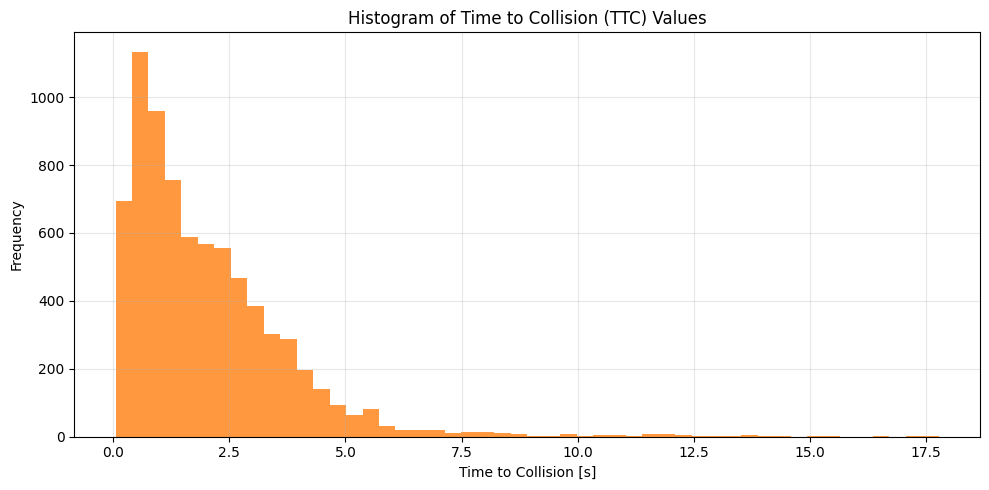

(None,
 count    7490.000000
 mean        2.033361
 std         1.779550
 min         0.048090
 25%         0.776896
 50%         1.587992
 75%         2.813032
 max        17.780793
 dtype: float64)

In [14]:
# Show the statistics of the 'time_to_collision' column across all linked dataframes

ttc_values = []
for key, df in linked_data.items():
    if 'time_to_collision' in df.columns:
        ttc_values.extend(df['time_to_collision'].tolist())
    else:
        print(f"Skipping {key}: 'time_to_collision' column not found")
ttc_series = pd.Series(ttc_values)
ttc_series.describe()

# Plot histogram of time to collision values
plt.figure(figsize=(10, 5))
plt.hist(ttc_series, bins=50, color='tab:orange', alpha=0.8)
plt.title('Histogram of Time to Collision (TTC) Values')
plt.xlabel('Time to Collision [s]')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show(), ttc_series.describe()



#### Statistics of the variables observed: speed and acceleration

E-scooter Speed Statistics:
 count    4019.000000
mean        3.417529
std         1.033335
min         0.349000
25%         2.666000
50%         3.297000
75%         4.129000
max         6.748000
dtype: float64
E-bike Speed Statistics:
 count    3471.000000
mean        3.767930
std         1.148912
min         0.705000
25%         3.039000
50%         3.633000
75%         4.631500
max         6.308000
dtype: float64
E-scooter Acceleration Statistics:
 count    4019.000000
mean        0.816433
std         0.650787
min         0.024223
25%         0.474274
50%         0.699151
75%         0.945819
max        10.694582
dtype: float64
E-bike Acceleration Statistics:
 count    3471.000000
mean        0.825875
std         0.468367
min         0.022454
25%         0.498790
50%         0.735233
75%         1.050755
max         4.521034
dtype: float64


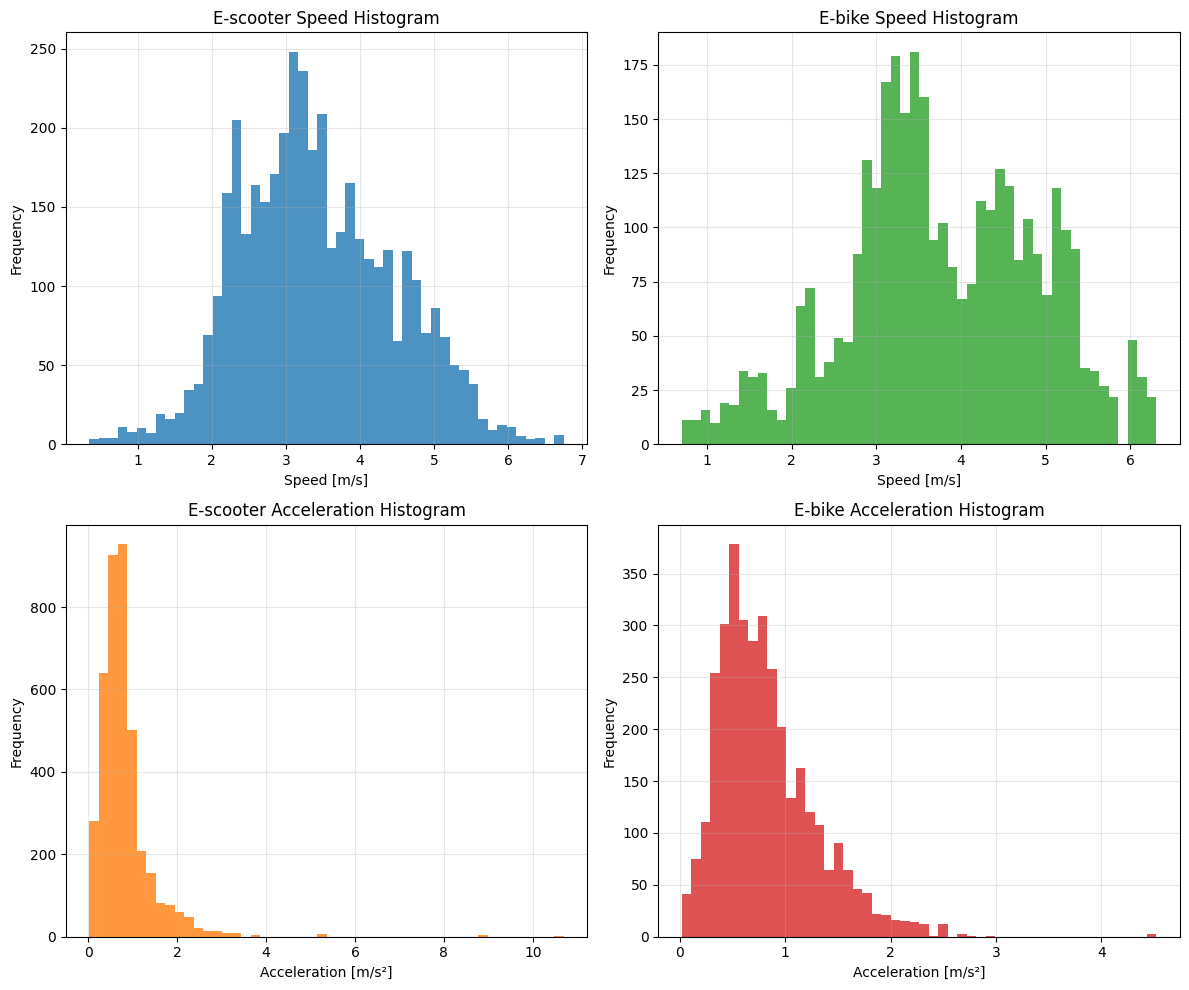

In [15]:
# Show the statistics of the speed and acceleration column across all linked dataframe for e-scooter and e-bike

# Add an acceleration column according to the three accelerations (X, Y, Z)
for key in linked_data:
    df = linked_data[key]
    if all(col in df.columns for col in ['Accelerometer (x) Filtered [m/s²]', 'Accelerometer (y) Filtered [m/s²]', 'Accelerometer (z) Filtered [m/s²]']):
        df['GPS (2D acceleration) [m/s²]'] = np.sqrt(df['Accelerometer (x) Filtered [m/s²]']**2 + df['Accelerometer (y) Filtered [m/s²]']**2)
    else:
        print(f"Skipping {key}: required acceleration columns not found")

# Differentiate e-scooter and e-bike based on the keys
e_scooter_speeds = []
e_bike_speeds = []
e_scooter_accels = []
e_bike_accels = []
for key in linked_data:
    df = linked_data[key]
    if 'GPS (2D speed) [m/s]' in df.columns and 'GPS (2D acceleration) [m/s²]' in df.columns:
        if 'escooter' in key.lower():
            e_scooter_speeds.extend(df['GPS (2D speed) [m/s]'].tolist())
            e_scooter_accels.extend(df['GPS (2D acceleration) [m/s²]'].tolist())
        elif 'ebike' in key.lower():
            e_bike_speeds.extend(df['GPS (2D speed) [m/s]'].tolist())
            e_bike_accels.extend(df['GPS (2D acceleration) [m/s²]'].tolist())
    else:
        print(f"Skipping {key}: required speed or acceleration columns not found")
        
e_scooter_speed_series = pd.Series(e_scooter_speeds)
e_bike_speed_series = pd.Series(e_bike_speeds)
e_scooter_accel_series = pd.Series(e_scooter_accels)
e_bike_accel_series = pd.Series(e_bike_accels)
print("E-scooter Speed Statistics:\n", e_scooter_speed_series.describe())
print("E-bike Speed Statistics:\n", e_bike_speed_series.describe())
print("E-scooter Acceleration Statistics:\n", e_scooter_accel_series.describe())
print("E-bike Acceleration Statistics:\n", e_bike_accel_series.describe())

# Plot histograms of speed and acceleration for e-scooter and e-bike
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(e_scooter_speed_series, bins=50, color='tab:blue', alpha=0.8)
axs[0, 0].set_title('E-scooter Speed Histogram')
axs[0, 0].set_xlabel('Speed [m/s]')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(alpha=0.3)
axs[0, 1].hist(e_bike_speed_series, bins=50, color='tab:green', alpha=0.8)
axs[0, 1].set_title('E-bike Speed Histogram')
axs[0, 1].set_xlabel('Speed [m/s]')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(alpha=0.3)
axs[1, 0].hist(e_scooter_accel_series, bins=50, color='tab:orange', alpha=0.8)
axs[1, 0].set_title('E-scooter Acceleration Histogram')
axs[1, 0].set_xlabel('Acceleration [m/s²]')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(alpha=0.3)
axs[1, 1].hist(e_bike_accel_series, bins=50, color='tab:red', alpha=0.8)
axs[1, 1].set_title ('E-bike Acceleration Histogram')
axs[1, 1].set_xlabel('Acceleration [m/s²]')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(alpha=0.3)
plt.tight_layout()
plt.show()  

In [16]:
# Compare the variables using a statistical test (t_test)

# Hypothesis tested:
# H0: The means of the two groups are equal (no difference between e-scooter and e-bike)
# H1: The means of the two groups are different (difference between e-scooter and e-bike)

from scipy.stats import ttest_ind
speed_t_stat, speed_p_value = ttest_ind(e_scooter_speed_series, e_bike_speed_series, equal_var=False)
accel_t_stat, accel_p_value = ttest_ind(e_scooter_accel_series, e_bike_accel_series, equal_var=False)
print(f"E-scooter vs E-bike Speed: t-statistic = {speed_t_stat:.4f}, p-value = {speed_p_value:.4e}")
print(f"E-scooter vs E-bike Acceleration: t-statistic = {accel_t_stat:.4f}, p-value = {accel_p_value:.4e}")

E-scooter vs E-bike Speed: t-statistic = -13.7866, p-value = 1.0962e-42
E-scooter vs E-bike Acceleration: t-statistic = -0.7272, p-value = 4.6711e-01


## Implementation into a simulation

In [ ]:
# ------------------------------
# O. Simulation parameters
# ------------------------------

# --- Simulation time parameters ---
dt = 0.333          # simulation time step (s)
reaction_steps = 3  # number of steps to implement planned velocity (1 s)

# --- Base walking speed ---
base_speed =  0.85  # m/s

# --- Direction slices (5 slices from 6 boundaries in degrees) ---
slice_bounds_deg = [-85, -30, -5, 5, 30, 85]
slice_bounds_rad = np.deg2rad(slice_bounds_deg)
n_slices = len(slice_bounds_rad) - 1  # 5 slices

# --- Speed change options (-1: decelerate, 0: maintain, 1: accelerate) ---
speed_options = [-1, 0, 1]

# --- Mean acceleration threshold for empirical choice ---
accel_threshold = 0.2  # m/s^2

In [18]:
# ------------------------------
# 1. Helper functions
# ------------------------------

def safe_unit_vector(v, default=[1.0, 0.0]):
    """
    Normalize a vector safely. 
    If the vector is zero-length, return the default vector.
    """
    v = np.array(v, dtype=float)
    norm = np.linalg.norm(v)
    if norm < 1e-8:
        return np.array(default, dtype=float)
    return v / norm


def logitprob(u):
    """Convert utilities to probabilities, NaN-safe."""
    u = np.array(u, dtype=float)
    u = np.nan_to_num(u, nan=-1e6)  # replace NaNs with large negative
    u -= np.max(u)  # avoid overflow
    e = np.exp(u)
    if np.sum(e) < 1e-12:  # avoid division by zero
        e = np.ones_like(e)
    return e / np.sum(e)


def angle_between_deg(u, v):
    """Compute the angle between two vectors in degrees, NaN-safe."""
    u = safe_unit_vector(u)
    v = safe_unit_vector(v)
    cosang = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    cosang = np.clip(cosang, -1, 1)
    return np.degrees(np.arccos(cosang))


def get_slice_vectors_forward(current_dir, slice_bounds_rad):
    """
    Compute unit vectors for directional slices relative to heading
    """

    current_dir = safe_unit_vector(current_dir)
    dirs = []

    for i in range(len(slice_bounds_rad) - 1):
        mid_angle = 0.5 * (slice_bounds_rad[i] + slice_bounds_rad[i+1])

        # Rotate the direction
        R = np.array([[np.cos(mid_angle), -np.sin(mid_angle)],
                      [np.sin(mid_angle),  np.cos(mid_angle)]])
        dir_vec = R @ current_dir

        # Forward bias: rotate any backward vector to 10° forward instead of cutting it
        if dir_vec[0] < 0:
            dir_vec = safe_unit_vector([np.cos(np.deg2rad(10)), np.sin(np.deg2rad(10))])

        dirs.append(dir_vec)
    return dirs


#### Model using simplified dynamics for pedestrians and movement model for the MMVs

In [20]:
# ------------------------------
# 2. Choice model for direction and acceleration
# ------------------------------

def choose_velocity(current_dir, current_speed):
    """
    Compute utility for all (direction, acceleration) alternatives.
    Sample one according to logit probabilities.
    Return velocity vector (direction × speed).
    Acceleration thresholds are applied empirically (±0.2 m/s²).
    """

    # 0. Ensure current heading is a valid unit vector
    current_dir = safe_unit_vector(current_dir)

    # 1. Compute candidate direction vectors for the 5 slices
    dirs = get_slice_vectors_forward(current_dir, slice_bounds_rad)

    # 2. Initialize lists to store utility values and alternatives
    utilities, alternatives = [], []

    # 3. Loop over each candidate direction
    for dir_vec in dirs:
        # Ensure candidate direction is safe
        dir_vec = safe_unit_vector(dir_vec)

        # 3a. Compute angular difference between current heading and candidate
        angle_diff = angle_between_deg(current_dir, dir_vec)

        # --- Estimated Biogeme parameters ---
        BETA_ANGLE = -0.201682
        ASC_ACC    = -1.048302
        ASC_DEC    = -1.041317

        # 3b. Loop over the 3 acceleration choices
        for s in speed_options:
            # 3c. Assign ASC depending on acceleration choice
            asc = ASC_ACC if s == 1 else ASC_DEC if s == -1 else 0

            # 3d. Compute utility for this alternative
            utilities.append(BETA_ANGLE * angle_diff + asc)

            # 3e. Store the alternative as (direction vector, acceleration)
            alternatives.append((dir_vec, s))

    # 4. Replace any NaNs in utilities with very negative number
    utilities = np.nan_to_num(utilities, nan=-1e6)

    # 5. Convert utilities to probabilities using logitprob
    probs = logitprob(utilities)

    # 6. Ensure probabilities sum to 1 and contain no NaNs
    probs = np.nan_to_num(probs, nan=0.0)
    if probs.sum() < 1e-12:
        probs = np.ones_like(probs) / len(probs)
    else:
        probs /= probs.sum()

    # 7. Sample one alternative according to probabilities
    idx = np.random.choice(len(alternatives), p=probs)
    dir_vec, s = alternatives[idx]

    # 8. Map acceleration choice to speed change (±0.2 m/s²)
    accel = accel_threshold if s == 1 else -accel_threshold if s == -1 else 0.0

    # 9. Compute target speed integrating over reaction horizon
    target_speed = current_speed + accel * dt * reaction_steps

    # 10. Return velocity vector combining direction and speed
    return dir_vec * target_speed

In [21]:
# ------------------------------
# 3. Pedestrian class
# ------------------------------

class Pedestrian:
    def __init__(self, pos, target):
        # 1. Store the current position as a numpy array
        self.pos = np.array(pos, float)
        # 2. Store the goal position
        self.target = np.array(target, float)
        # 3. Initialize starting velocity equal to the mean speed
        self.vel = np.array([base_speed, 0.0])
        # 4. Create a buffer for planned velocities to implement reaction delay
        # Initialize with base speed instead of zeros
        self.buffer = [np.array([base_speed, 0.0]) for _ in range(reaction_steps)]
        # 5. Store the trajectory (starting with initial position)
        self.traj = [self.pos.copy()]

    def heading(self):
        """
        Return current heading as a unit vector.
        Ensures positive x-component and NaN-safe normalization.
        """
        # Prefer current velocity if available
        if np.linalg.norm(self.vel) > 1e-6:
            h = safe_unit_vector(self.vel)
        else:
            h = safe_unit_vector(self.target - self.pos)

        # Ensure x-component is positive
        if h[0] < 0:
            h[0] = 0.0
            h = safe_unit_vector(h)

        return h

    def step(self):

        """
        Smoothly execute planned velocity over reaction horizon.
        """
        # 1. Plan next velocity
        plan = choose_velocity(self.heading(), np.linalg.norm(self.vel))
        self.buffer.append(plan)

        # 2. Pop the oldest planned velocity
        target_vel = self.buffer.pop(0)

        # 3. Smooth transition: move current velocity toward target velocity
        alpha = 1.0 / reaction_steps  # fraction to move each step
        self.vel = (1 - alpha) * self.vel + alpha * target_vel

        # 4. Update position
        self.pos += self.vel * dt
        self.traj.append(self.pos.copy())


In [22]:
# ------------------------------
# 4. Run the simulation
# ------------------------------

def run_sim_corridor(n_agents=40, steps=120, width=10.0, height=6.0, entry_interval=3):
    """
    Run a pedestrian simulation in a corridor of given width and height.
    Pedestrians enter progressively from the left (x=0) to right (x=width).
    
    Parameters:
        n_agents: total number of agents
        steps: total simulation steps
        width: corridor width
        height: corridor height
        entry_interval: steps between consecutive agent entries
    """
    agents = []
    active_agents = []  # agents currently in the corridor

    # Precompute y-positions to assign to agents as they enter
    y_positions = np.linspace(0.3, height-0.3, n_agents)  # avoid exact edges

    for step in range(steps):
        # Determine if a new agent should enter this step
        if step % entry_interval == 0:
            agent_index = step // entry_interval
            if agent_index < n_agents:
                pos = [0.0, y_positions[agent_index]]
                target = [width, y_positions[agent_index]]
                new_agent = Pedestrian(pos, target)
                active_agents.append(new_agent)

        # Move all active agents
        for agent in active_agents:
            agent.step()

    return active_agents

agents = run_sim_corridor(n_agents=40, steps=120, width=10.0, height=6.0, entry_interval=3)


#### Model using simplified dynamics for pedestrians and movement model for the MMVs